# 1. Setup & Load Data

## 1.1 Install Dependencies and Setup

In [1]:
!pip install tensorflow==2.8 tensorflow-gpu==2.8 opencv-python matplotlib  protobuf==3.19.1

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       2.1.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi

In [32]:
! python --version

Python 3.9.13


In [1]:
import tensorflow as tf
import os

In [5]:
!pip install numpy==1.24.0

     ---------------------------------------- 14.9/14.9 MB 7.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\User\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 1.2 Remove dodgy images

In [2]:
import cv2
import imghdr

In [3]:
# Filename of image folders
data_dir = 'data' 

In [4]:
# acceptable image formats
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
# for happy & sad folders in data folder
for image_class in os.listdir(data_dir): 
    
    # for each image in both happy & sad folders combined (saved in data folder) 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        
        # joining paths of all images
        image_path = os.path.join(data_dir, image_class, image)
        
        try: 
            # cv2.imread(image) = loads an image from the specified file
            img = cv2.imread(image_path)
            
            # imghdr.what(file) = return a string describing the image type
            tip = imghdr.what(image_path)
            
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
                
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
# os module

# os.listdir(path='') = Return a list containing the names of the entries in the directory given by path

# os.path module - manipulate paths

# os.path.join(path to be saved at, *paths to be combined) = join 1 or more path segments

## 1.3 Load Data

In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [21]:
# Load images into dataset (creates IMAGE dataset)
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [22]:
# .as_numpy_iterator() =  returns an iterator which converts all elements of the dataset to numpy
# iterator = object that allows you to iterate over collections of data, such as lists, tuples, dictionaries, and sets
# data iterators are often used to load data in manageable chunks (batches), especially when dealing with large datasets
# allowing access to data pipeline
data_iterator = data.as_numpy_iterator()

In [23]:
# .next() = returns the next item in an iterator
# accessed data pipeline
# by default batch_size is 32
batch = data_iterator.next()

In [73]:
len(batch)

# batch[0] = image as numpy array
# batch[1] = label 0/1 (happy/sad)

2

In [74]:
batch[0].shape

(17, 256, 256, 3)

In [75]:
batch[1]

(17,)

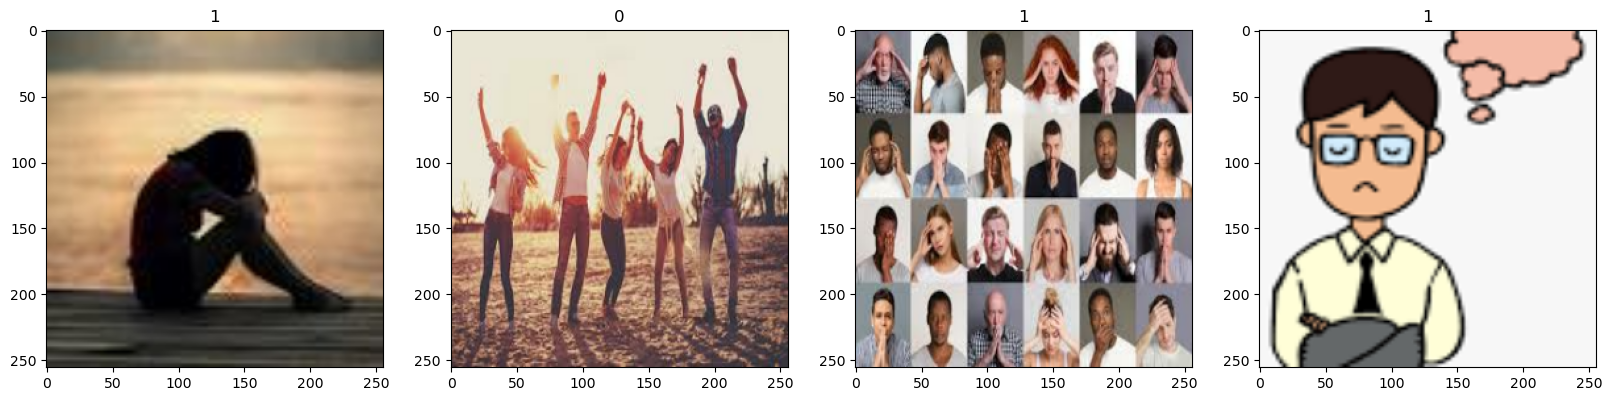

In [24]:
# plt.subplots() = creates figure & a set of subplots (nrows & ncols = 1 by default)
# returns figure (fig) & axes/array of axes (ax)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

# enumerate(iterable, start=0) = adds a counter to an iterable & returns it in the form of an enumerating object
# <class 'enumerate'> = [(index, element)

# iterating over 1st 4 images in batch
for idx, img in enumerate(batch[0][:4]):
    
    # display each image of index idx (need to convert image data to int for proper display)
    ax[idx].imshow(img.astype(int))
    
    # sets title for current subplot as its class label
    ax[idx].title.set_text(batch[1][idx])
    
# 0 -> happy
# 1 -> sad

# 2. Preprocess Data

## 2.1 Scale Data

In [25]:
# make data btw 0 to 1 -> divide by 255 of image pixel num of RGB
# .map(map_func) = performs transformation of map_func in pipeline -> faster
data = data.map(lambda x,y: (x/255, y))

In [82]:
data.as_numpy_iterator().next() # one step

(array([[[[0.19905025, 0.19512868, 0.1166973 ],
          [0.20155483, 0.19719669, 0.11397059],
          [0.2995251 , 0.2759957 , 0.18921569],
          ...,
          [0.17293198, 0.15124081, 0.07489277],
          [0.10036765, 0.10502451, 0.04249387],
          [0.06370251, 0.08512561, 0.00225184]],
 
         [[0.22859988, 0.21042432, 0.14099264],
          [0.26007965, 0.23262867, 0.1604473 ],
          [0.2610907 , 0.25324756, 0.16648284],
          ...,
          [0.17677696, 0.14932598, 0.07814798],
          [0.16260724, 0.15476409, 0.1037837 ],
          [0.13270527, 0.14735754, 0.08485754]],
 
         [[0.24093904, 0.2213312 , 0.13505667],
          [0.2879672 , 0.25659466, 0.16639858],
          [0.23755361, 0.22468597, 0.1330193 ],
          ...,
          [0.21293658, 0.18940717, 0.10313266],
          [0.21085325, 0.18200827, 0.10719976],
          [0.16227022, 0.15810356, 0.07942709]],
 
         ...,
 
         [[0.81798404, 0.38715532, 0.6112745 ],
          [0.81068

## 2.2 Split Data

In [84]:
# num of batches
len(data)

10

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [87]:
test_size

1

In [30]:
# takes first train_size amount of samples from dataset to be training set
train = data.take(train_size)

# skips train_szie samples & takes val_size samples to be validation set
val = data.skip(train_size).take(val_size)

# skips train_sze + val_size samples & takes test_size samples to be test set
test = data.skip(train_size+val_size).take(test_size)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Deep Model

## 3.1 Build Deep Learning Model

In [33]:
# Sequential API: Good for 1 input 1 output (Quick & Easy)
# flows top to bottom
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# conv2D = 2d convolution layer
# MaxPooling2D = condensing layer -> condenses to max value & returns
# Dense = fully-connected layer
# Flatten = reduces format
# Dropout = regularization

# Functional API: multi-input & multi-output
# from tensorflow.keras.models import Model

In [34]:
# make instance for model

# Sequential model = appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential()

In [35]:
# add layers sequentially

# 3 convolution blocks
# CNN layer
# Conv2D(filter_num, filter_size, stride, activation, input_shape)
# stride = how many pixels it moves thru
# relu = only passes +ve values
# input_shape only required in input layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) # returns max in each (2,2) -> condense

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Flatten layer = removes channel values & returns 1 value (multiplies dimensions into 1 value)
model.add(Flatten())

# 2 dense layers = fully-connected layers
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # output single value -> sigmoid

In [36]:
# compile = assign optimizer (adam) & target loss function (binary cross entropy -> good for binary classification model)
# optimizer = function or algorithm that adjusts the attributes of the neural network, such as weights and learning rates
# metrics = what aspects we want to track -> accuracy = how well it does
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [37]:
model.summary()

# max_pooling2d halves the shape of conv2d
# flatten: 30*30*16 = 14400

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 3.2 Train

In [41]:
logdir='logs'

In [42]:
# checkpoint
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
# Train => model.fit()
# made into variable 'hist' to be able to plot later

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 12s 1s/step - loss: 0.7132 - accuracy: 0.4955 - val_loss: 0.6780 - val_accuracy: 0.6406
Epoch 2/20
7/7 [==============================] - 11s 1s/step - loss: 0.6781 - accuracy: 0.5446 - val_loss: 0.6689 - val_accuracy: 0.5625
Epoch 3/20
7/7 [==============================] - 11s 1s/step - loss: 0.6625 - accuracy: 0.6116 - val_loss: 0.6475 - val_accuracy: 0.5781
Epoch 4/20
7/7 [==============================] - 17s 1s/step - loss: 0.6270 - accuracy: 0.6384 - val_loss: 0.5499 - val_accuracy: 0.7500
Epoch 5/20
7/7 [==============================] - 17s 2s/step - loss: 0.5807 - accuracy: 0.6607 - val_loss: 0.5632 - val_accuracy: 0.7031
Epoch 6/20
7/7 [==============================] - 19s 2s/step - loss: 0.5025 - accuracy: 0.7589 - val_loss: 0.5303 - val_accuracy: 0.7500
Epoch 7/20
7/7 [==============================] - 20s 2s/step - loss: 0.4595 - accuracy: 0.7991 - val_loss: 0.3452 - val_accuracy: 0.8750
Epoch 8/20
7/7 [==================

## 3.3 Plot Performance

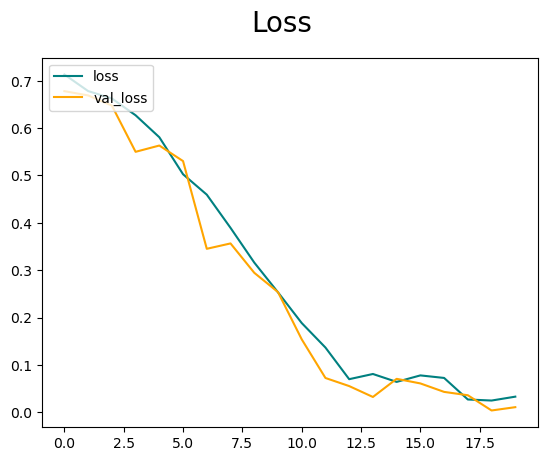

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss') # training loss
plt.plot(hist.history['val_loss'], color='orange', label='val_loss') # validation loss
# if conervge -> may be variance problem
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# ideally both lines should decrease steadily
# if there is sudden spike, may be overfitted -> regularize, use larger NN

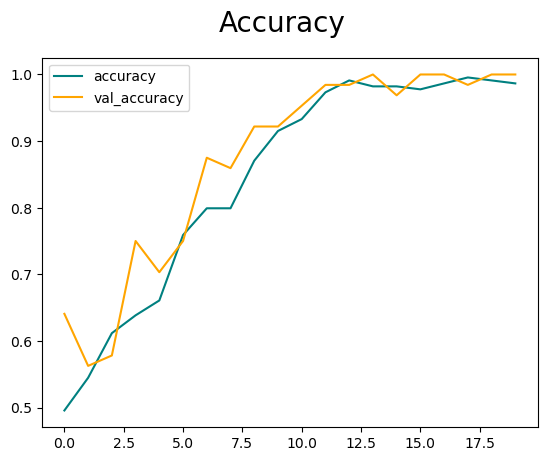

In [45]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance on Testing Data

## 4.1 Evaluate

In [46]:
# important measures for classification problems

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [48]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [49]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.875, shape=(), dtype=float32) tf.Tensor(0.9411765, shape=(), dtype=float32)


## 4.2 Test

In [89]:
import cv2

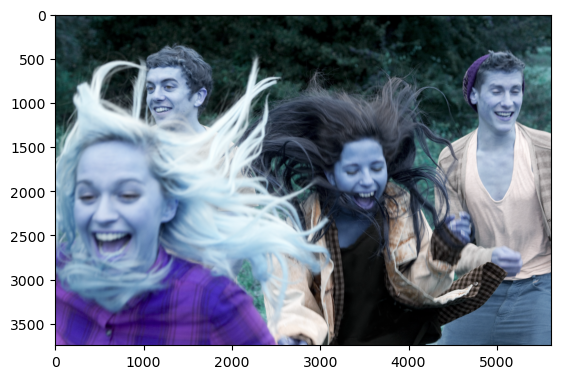

In [90]:
img = cv2.imread('154006829.jpg')
plt.imshow(img) # reads in BGR
plt.show()

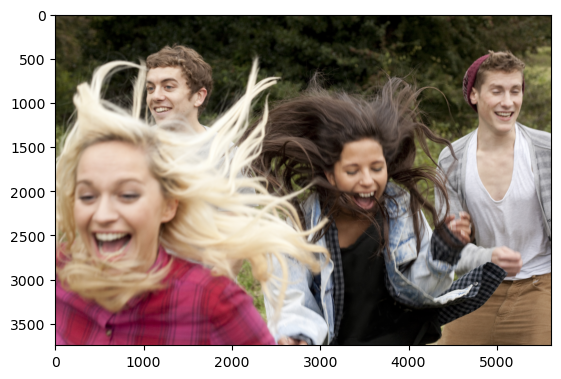

In [93]:
# change to RGB

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

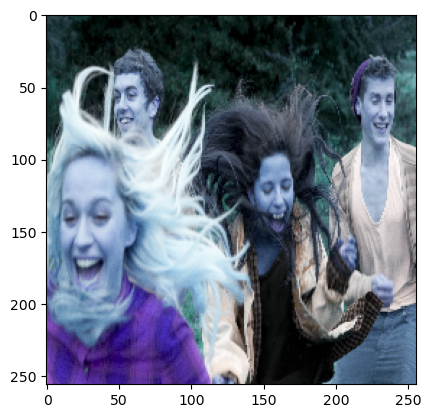

In [52]:
resize = tf.image.resize(img, (256,256)) # need to resize to be able to pass thru NN
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
# make prediction => model.predict()
# .expand_dims() = encapsulates in another list to match format of NN
yhat = model.predict(np.expand_dims(resize/255, 0))

In [54]:
yhat # if < 0.5 = happy, > 0.5 = sad

array([[0.00461174]], dtype=float32)

In [55]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save & Load the Model

In [60]:
from tensorflow.keras.models import load_model

In [61]:
# save model in folder specified
# h5 format = serialized format (zipped)
model.save(os.path.join('models','imageclassifiernewversionlive.h5'))

In [68]:
# load model
new_model = load_model(os.path.join('models','imageclassifiernewversionlive.h5'))

In [69]:
# making prediction with the new model loaded
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.00461174]], dtype=float32)